In [1]:
# !wget https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("../data/CreditScoring.csv")

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.describe().round()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [8]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [9]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [11]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
    

In [12]:
df = df[df.status != 'unk'].reset_index(drop=True)


In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [16]:
del df_train['status']
del df_val['status']
del df_test['status']


In [17]:
df_test

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,owner,36,26,single,no,freelance,35,0.0,60000.0,3000.0,800,1000
1,10,rent,60,28,married,no,fixed,78,325.0,18.0,3000.0,2250,2250
2,14,rent,60,41,married,no,fixed,53,181.0,0.0,0.0,1150,2497
3,4,owner,60,39,married,no,freelance,45,0.0,7500.0,0.0,1300,1508
4,1,other,30,20,single,no,fixed,35,90.0,0.0,0.0,450,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,19,owner,12,42,married,no,fixed,90,464.0,5000.0,0.0,1100,2413
887,7,owner,36,24,married,no,fixed,45,95.0,3000.0,0.0,1000,1597
888,0,owner,24,28,married,no,partime,45,219.0,6000.0,0.0,600,943
889,8,other,36,30,married,yes,freelance,75,100.0,4000.0,1365.0,1220,1745


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [19]:
train_dicts = df_train.fillna(0).to_dict(orient='records')


In [20]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [21]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

### Tuning Decision Tree parameters
- max_depth
- min_samples_leaf

In [22]:
depths = [1,2,3,4,5,6,8,9,10,20,25,30,50]

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.753
   8 -> 0.736
   9 -> 0.717
  10 -> 0.686
  20 -> 0.659
  25 -> 0.671
  30 -> 0.659
  50 -> 0.646


In [23]:
from sklearn.tree import export_text

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier


top_depths = [4,5,6]
min_sample_leaf = [1, 5, 10, 15, 20, 500, 100, 200]

scores = []
for d in top_depths:
    for s in min_sample_leaf:
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val,y_pred)

        scores.append((d,s,auc))

In [26]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [28]:
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,500,0.679842
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766938
9,5,5,0.767755


In [39]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.750
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.773  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

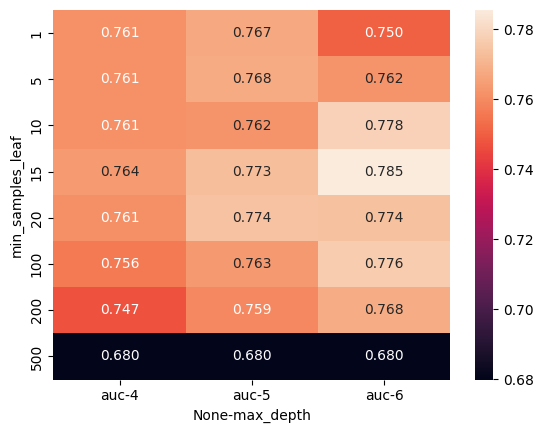

In [40]:
sns.heatmap(df_scores_pivot,annot=True,fmt=".3f")

In [29]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [30]:
print(export_text(dt,feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1600.00
|   |   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1600.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- clas

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
scores = []

for d in range(1,50,10):
    for l in range(1,5,3):
        rf = RandomForestClassifier(n_estimators=10,random_state=1,min_samples_leaf=l,max_depth=d)
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_test,y_pred)

        print(f"l={l},d={d},auc={auc}")
        scores.append((l,auc))

l=1,d=1,auc=0.504566614534969
l=4,d=1,auc=0.504566614534969
l=1,d=11,auc=0.5221182982258932
l=4,d=11,auc=0.49671325937148725
l=1,d=21,auc=0.4804811592786276
l=4,d=21,auc=0.4998014515419579
l=1,d=31,auc=0.47903633742241336
l=4,d=31,auc=0.4998014515419579
l=1,d=41,auc=0.47903633742241336
l=4,d=41,auc=0.4998014515419579


In [33]:
import xgboost as xgb

In [37]:
features

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [43]:
# features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train,label=y_train)
dval = xgb.DMatrix(X_val,label=y_test)

In [45]:
xgb_params = {
    "eta":0.3,
    "max_depth":6,
    "min_child_weight":1,

    'objective':'binary:logistic',
    'nthread':8,

    'seed':1,
    'verbosity':1,

}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [46]:
y_pred = model.predict(dval)

roc_auc_score(y_val,y_pred)

np.float64(0.8065256351262986)

In [47]:
watchlist =[(dtrain, 'train'), (dval, 'val')]

In [48]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [49]:
s = output.stdout

In [50]:
print(s)

[0]	train-auc:0.86730	val-auc:0.48665
[5]	train-auc:0.93086	val-auc:0.49253
[10]	train-auc:0.95447	val-auc:0.49655
[15]	train-auc:0.96554	val-auc:0.49709
[20]	train-auc:0.97464	val-auc:0.50127
[25]	train-auc:0.97953	val-auc:0.49937
[30]	train-auc:0.98579	val-auc:0.50279
[35]	train-auc:0.99011	val-auc:0.50336
[40]	train-auc:0.99421	val-auc:0.50290
[45]	train-auc:0.99548	val-auc:0.50516
[50]	train-auc:0.99653	val-auc:0.50615
[55]	train-auc:0.99765	val-auc:0.50357
[60]	train-auc:0.99817	val-auc:0.50484
[65]	train-auc:0.99887	val-auc:0.50653
[70]	train-auc:0.99934	val-auc:0.50591
[75]	train-auc:0.99965	val-auc:0.50581
[80]	train-auc:0.99979	val-auc:0.50311
[85]	train-auc:0.99988	val-auc:0.50086
[90]	train-auc:0.99993	val-auc:0.50018
[95]	train-auc:0.99996	val-auc:0.50030
[100]	train-auc:0.99998	val-auc:0.49908
[105]	train-auc:0.99999	val-auc:0.49878
[110]	train-auc:1.00000	val-auc:0.49814
[115]	train-auc:1.00000	val-auc:0.49750
[120]	train-auc:1.00000	val-auc:0.49861
[125]	train-auc:1.0000